In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data.csv')


In [3]:
# Splitting into features (sentences) and labels (sentiments)
X = df['Sentence']
y = df['Sentiment']


In [4]:
# Vectorizing text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


In [5]:
# Train-test split (80:20)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train-test split (90:10)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_vectorized, y, test_size=0.1, random_state=42)


In [6]:
# Function to perform Naive Bayes classification and metrics calculation
def evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    # Training the Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)

    # Predictions
    y_pred = classifier.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy


Accuracy: 0.7134302822925578
Confusion Matrix:
[[ 61  77  37]
 [ 49 523  50]
 [ 19 103 250]]


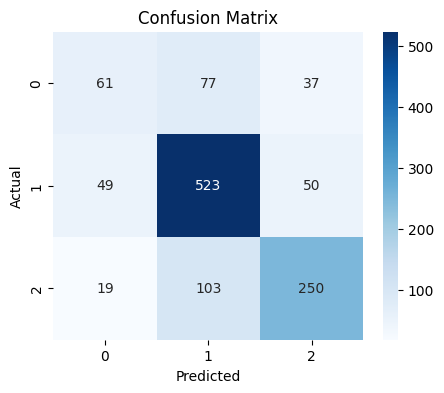

Accuracy: 0.7042735042735043
Confusion Matrix:
[[ 38  29  23]
 [ 32 254  26]
 [ 10  53 120]]


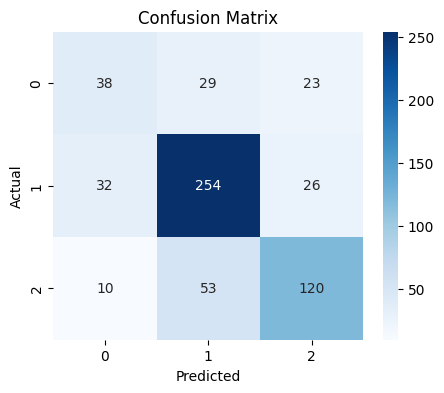

In [7]:
# Train-test evaluation (80:20)
accuracy_80 = evaluate_naive_bayes(X_train_80, X_test_80, y_train_80, y_test_80)

# Train-test evaluation (90:10)
accuracy_90 = evaluate_naive_bayes(X_train_90, X_test_90, y_train_90, y_test_90)


In [8]:
# 5-fold cross-validation
cv_scores_5_fold = cross_val_score(MultinomialNB(), X_vectorized, y, cv=5)
print("5-fold CV Average Accuracy:", 100*cv_scores_5_fold.mean())

# 10-fold cross-validation
cv_scores_10_fold = cross_val_score(MultinomialNB(), X_vectorized, y, cv=10)
print("10-fold CV Average Accuracy:", 100*cv_scores_10_fold.mean())


5-fold CV Average Accuracy: 69.90790923046275
10-fold CV Average Accuracy: 69.85701323030091
